In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Bike_sharing  = pd.read_csv("/day.csv")
Bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike_sharing.shape

(730, 16)

In [4]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
Bike_sharing.drop('instant', inplace=True, axis=1)


In [7]:
Bike_sharing.drop('dteday', inplace=True, axis=1)

In [8]:
Bike_sharing.drop('casual', inplace=True, axis=1)

In [9]:
Bike_sharing.drop('registered', inplace=True, axis=1)

In [10]:
Bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


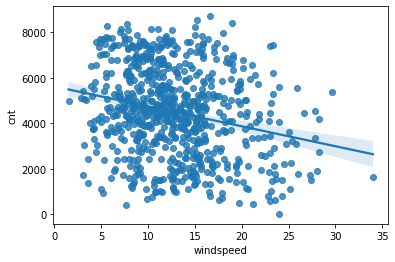

In [11]:
#Visualise the data
sns.regplot(x='windspeed', y = 'cnt', data = Bike_sharing)

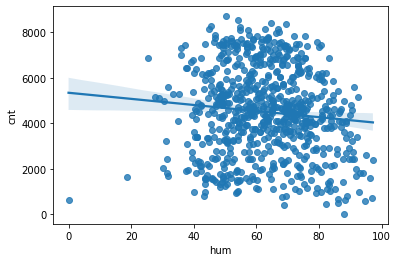

In [12]:
#Visualise the data
sns.regplot(x='hum', y = 'cnt', data = Bike_sharing)

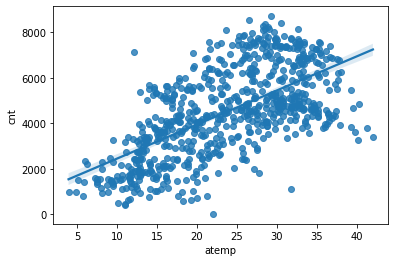

In [13]:
#Visualise the data
sns.regplot(x='atemp', y = 'cnt', data = Bike_sharing)

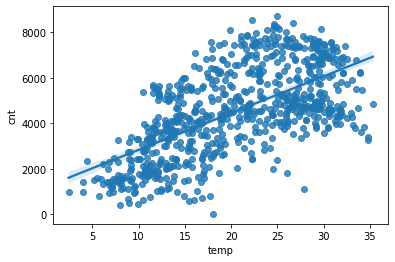

In [14]:
#Visualise the data
sns.regplot(x='temp', y = 'cnt', data = Bike_sharing)

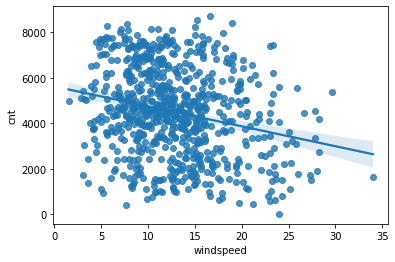

In [15]:
#Visualise the data
sns.regplot(x='windspeed', y = 'cnt', data = Bike_sharing)

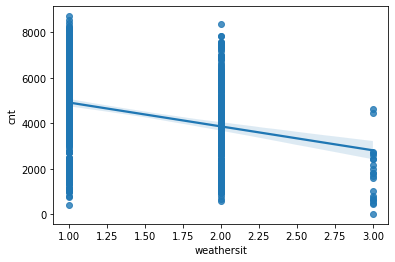

In [16]:
#Visualise the data
sns.regplot(x='weathersit', y = 'cnt', data = Bike_sharing)

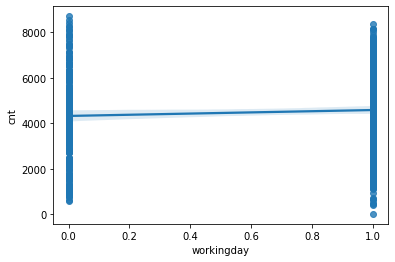

In [17]:
#Visualise the data
sns.regplot(x='workingday', y = 'cnt', data = Bike_sharing)

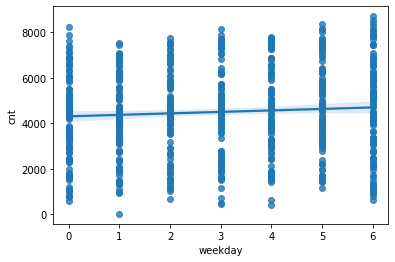

In [18]:
#Visualise the data
sns.regplot(x='weekday', y = 'cnt', data = Bike_sharing)

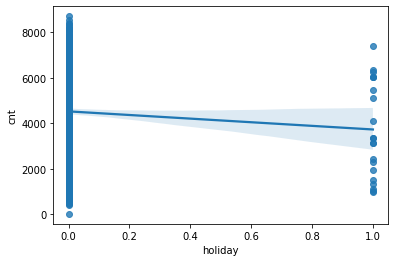

In [19]:
#Visualise the data
sns.regplot(x='holiday', y = 'cnt', data = Bike_sharing)

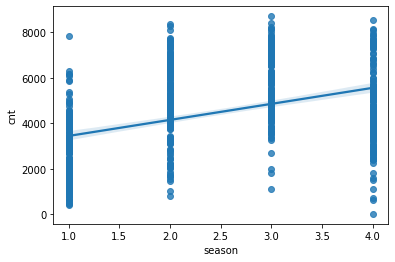

In [20]:
#Visualise the data
sns.regplot(x='season', y = 'cnt', data = Bike_sharing)

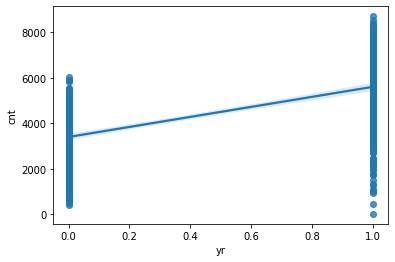

In [21]:
#Visualise the data
sns.regplot(x='yr', y = 'cnt', data = Bike_sharing)

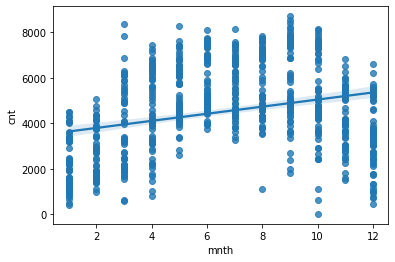

In [22]:
#Visualise the data
sns.regplot(x='mnth', y = 'cnt', data = Bike_sharing)

In [23]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define which columns should be encoded vs scaled
columns_to_encode = ['weathersit']
columns_to_scale  = ['workingday']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(Bike_sharing[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(Bike_sharing[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
processed_data

array([[-1.46975275,  0.        ,  1.        ,  0.        ],
       [-1.46975275,  0.        ,  1.        ,  0.        ],
       [ 0.68038655,  1.        ,  0.        ,  0.        ],
       ...,
       [-1.46975275,  0.        ,  1.        ,  0.        ],
       [-1.46975275,  1.        ,  0.        ,  0.        ],
       [ 0.68038655,  0.        ,  1.        ,  0.        ]])

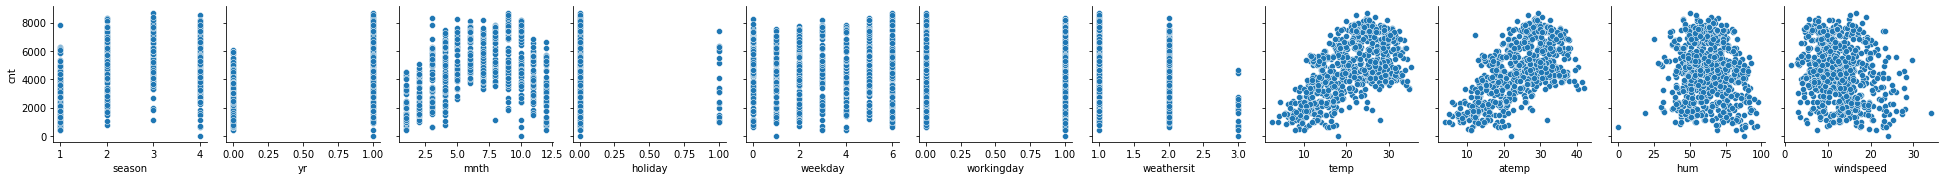

In [24]:
sns.pairplot(data = Bike_sharing, x_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'],y_vars = 'cnt')

In [25]:
Bike_sharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


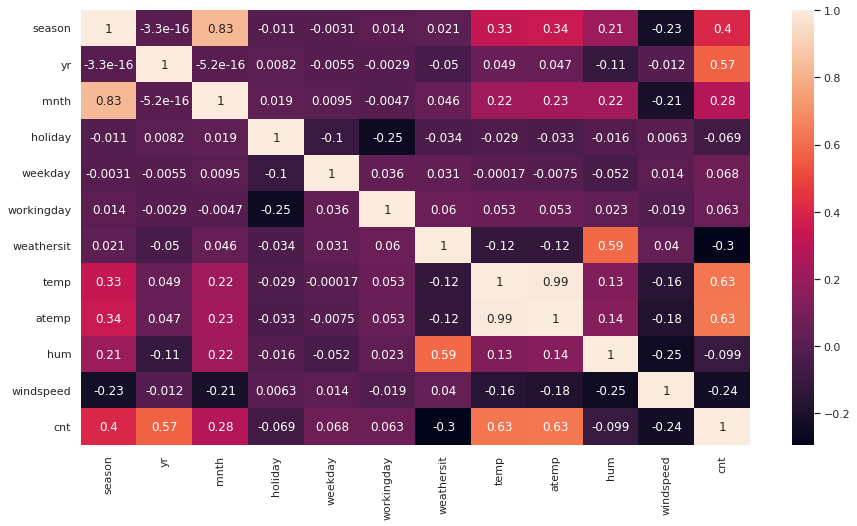

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Bike_sharing.corr(),annot = True)

In [27]:
##steps:
X = Bike_sharing['temp']
y = Bike_sharing['cnt']

In [28]:
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size = 0.70 , random_state = 100)

X_train

576    29.246653
426    16.980847
728    10.489153
482    15.443347
111    13.803347
         ...    
578    30.852500
53      9.091299
350    10.591653
79     17.647835
520    22.174153
Name: temp, Length: 510, dtype: float64

In [29]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,temp
576,1.0,29.246653
426,1.0,16.980847
728,1.0,10.489153
482,1.0,15.443347
111,1.0,13.803347


In [30]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    1080.739991
temp      169.313394
dtype: float64

In [31]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.46e-61
Time:                        15:53:57   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.7400    190.751      5.666      0.000     705.982    1455.498
temp         169.3134      8.899     19.026      0.000     151.830     186.797
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

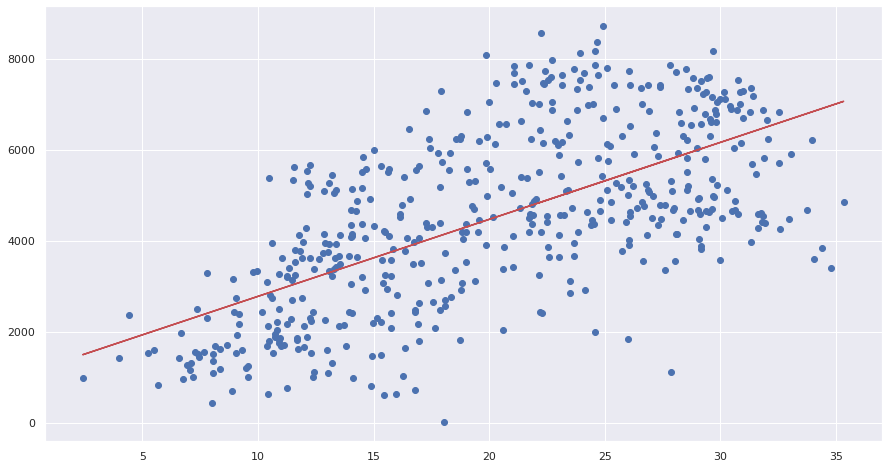

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 1080.74+169.31*X_train,'r')
plt.show()

In [ ]:
##dummy